The goal here is to evaluate the errors introduced adversarial training by a analyzing the added noise

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [2]:
origWeights = np.load('origWeights.npy')
modifiedWeights = np.load('modifiedWeights.npy')
origBiases = np.load('origBiases.npy')
modifiedBiases = np.load('modifiedBiases.npy')

In [3]:
def compute_minAndMax(listArrays):
    '''
    Function to find the smallest and largest elements 
    in a list of numpy arrays
    '''
    minVal = np.inf
    maxVal = -np.inf
    for arr in listArrays:
        if arr.min() < minVal:
            minVal = arr.min()
        if arr.max() > maxVal:
            maxVal = arr.max()
    return minVal, maxVal

In [4]:
def measure_noise(origValues, modifiedValues):
    noiseValues = []
    for origArr, modifiedArr in zip(origValues, modifiedValues):
        # error_arr is the element-wise difference of all values in the array
        errorArr = origArr - modifiedArr
        noiseValues.append(errorArr)
    return noiseValues

In [5]:
# mnist images are grayscale, so the depth is 1. In cifar10, depth is 3.
# The first 5 layers are convolutional layers in case of cifar10 while 
# only the first 3 are in case of mnist.
if origWeights[0].shape[2] == 1:
    numConvLayers = 3
else:
    numConvLayers = 5
r = measure_noise(origWeights[:numConvLayers], modifiedWeights[:numConvLayers])
min_noise, max_noise = compute_minAndMax(r)
print(min_noise, max_noise)

-0.0064432034 0.006821245


In [6]:
for layer in r:
    print(layer.T.shape)
allMatrices = []
colors = []
if numConvLayers == 3:
    color = ['r', 'g', 'b']
else:
    color = ['r', 'g', 'b', 'y', 'c']

for layer,c in zip(r,color):
    for filter in layer.T:
        for matrix in filter:
            allMatrices.append(matrix.flatten())
            colors.append(c)
allMatrices_tsne = TSNE(n_components=2, perplexity=100, n_iter=1200).fit_transform(allMatrices)
print(allMatrices_tsne.shape)

(32, 3, 3, 3)
(32, 32, 3, 3)
(64, 32, 3, 3)
(64, 64, 3, 3)
(128, 64, 3, 3)
(15456, 2)


Text(0.5, 1.0, 'Model Noise')

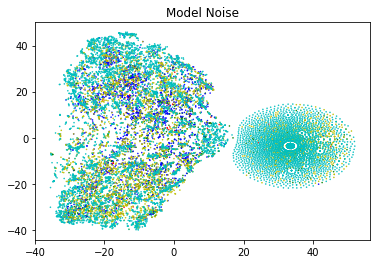

In [7]:
allMatrices_x, allMatrices_y = allMatrices_tsne.T
#plt.figure(figsize=(20,20))
plt.scatter(allMatrices_x, allMatrices_y, s=0.3, c=colors)
plt.title('Model Noise')

Text(0.5, 1.0, 'Model Noise')

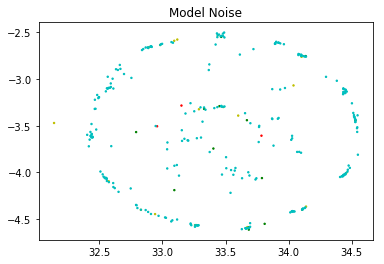

In [28]:
# Code to isolate the circular pattern from the plot
# Using 4 threshold values, I isolate the rectangular 
# region of the plot which contains the circular pattern
x_range = (32,35)#(17,60)
y_range = (-5,-2.5)#(-25,15)
indices = (allMatrices_x < x_range[1]) * (allMatrices_y < y_range[1]) * \
(allMatrices_x > x_range[0]) * (allMatrices_y > y_range[0])

# Plot the isolated pattern to verify that circular pattern 
# was correctly isolated
colors = np.array(colors)
plt.scatter(allMatrices_x[indices], allMatrices_y[indices], c = colors[indices], s=2)
plt.title('Model Noise')

In [29]:
len(np.nonzero(indices)[0])

298

In [30]:
patternIndices = np.nonzero(indices)[0]
print(patternIndices)

[   54    55    56   109   110   114   116   124   125   141   253   621
   626   807   850   941   978  4012  4180  4181  4182  4183  4184  4185
  4186  4187  4188  4189  4190  4191  5239  5240  5263  5279  6602  6604
  7462  7463  7464  7465  7466  7467  7468  7469  7470  7471  7472  7473
  7474  7476  7477  7478  7479  7480  7481  7482  7483  7484  7485  7486
  7487  7488  7489  7490  7491  7492  7493  7494  7495  7496  7497  7498
  7499  7500  7501  7502  7503  7504  7505  7506  7507  7508  7509  7510
  7511  7512  7513  7514  7515  7516  7517  7518  7519  7520  7526  7528
  7532  7533  7535  7545  7565  7568  7569  7573  7575  7578  7582  7584
  7585  7586  7587  7588  7589  7590  7591  7592  7593  7594  7596  7597
  7598  7599  7600  7601  7602  7603  7604  7605  7606  7607  7608  7609
  7610  7611  7612  7613  7614  7615  7616  7617  7618  7619  7620  7621
  7622  7623  7624  7625  7626  7627  7628  7629  7630  7631  7632  7633
  7634  7635  7636  7637  7638  7639  7640  7641  7

In [31]:
for idx in np.nditer(patternIndices):
    if (allMatrices[idx] != 0).any():
        print(idx)

In [36]:
allMatrices[7727]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
allRandom = []
for i in range(6176):
    randomFilter = (max_noise - min_noise) * np.random.random((3,3)) + min_noise
    allRandom.append(randomFilter.flatten())
#allRandom_tsne = TSNE(n_components=2, perplexity=40, n_iter=1200).fit_transform(allRandom)

In [ ]:
allRandom_x, allRandom_y = allRandom_tsne.T
plt.scatter(allRandom_x, allRandom_y, s=0.3)
plt.title('Random Noise')

In [ ]:
H = np.transpose(r[2])
f, axarr = plt.subplots(2,5, figsize=(15,7))
for num in range(10):
    axarr[num//5][num%5].imshow(H[num][0], cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()

In [ ]:
f, axarr = plt.subplots(2,5, figsize=(15,7))
for num in range(10):
    H = (max_noise - min_noise) * np.random.random((3,3)) + min_noise
    axarr.ravel()[num].imshow(H, cmap='gray', vmin=min_noise, vmax=max_noise)
plt.show()